In [2]:
# These lines import the Numpy and pandas modules.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Very basic introduction to Python and Jupyter
This is a Jupyter notebook. It's handy because you can run code, write text, and make plots all in one place. Each "cell" in the notebook is executed separately; you can "shift enter" on your keyboard to run a cell, or click the "Run" button at the top of the notebook. 

This cell is a `Markdown` cell, which means it will not execute as code but will instead render text in the Markdown language. You can change the cell type in the menu at the tope of the notebook. In this notebook, we will run through some basic Python operations and explore the functionality of a Jupyter notebook.

# Pandas

The Python library we will be using most in this course is `Pandas`, which is specifically designed to be used with data. Pandas provides simple tools for loading, manipulating, and analysing data. We will briefly walk through loading  and analyzing some data on house sales.

In [3]:
# load your data
df = pd.read_csv('data/Housing.csv')

# look at the first 5 rows
df.head()

,floor_size,bed_room_count,built_year,sold_date,sold_price,room_count,garage_size,parking_lot
0,2068,3,2003,Aug2015,195500,6,768,3
1,3372,3,1999,Dec2015,385000,6,480,2
2,3130,3,1999,Jan2017,188000,7,400,2
3,3991,3,1999,Nov2014,375000,8,400,2
4,1450,2,1999,Jan2015,136000,7,200,1


We can select individual columns by name as follows:

In [11]:
def get_year(sold_date):
	return int(sold_date[3:])

df["sold_year"] = df.sold_date.apply(get_year)


In [1]:
df.sold_date.apply(lambda x: int(x[3:]))


NameError: name 'df' is not defined

In [8]:
df["yr_ppr"] = df.apply(lambda x: str(x.built_year) +"-"+ str(round(x.sold_price/x.room_count)), axis=1)

In [9]:
df

,floor_size,bed_room_count,built_year,sold_date,sold_price,room_count,garage_size,parking_lot,yr_ppr
0,2068,3,2003,Aug2015,195500,6,768,3,2003-32583
1,3372,3,1999,Dec2015,385000,6,480,2,1999-64167
2,3130,3,1999,Jan2017,188000,7,400,2,1999-26857
3,3991,3,1999,Nov2014,375000,8,400,2,1999-46875
4,1450,2,1999,Jan2015,136000,7,200,1,1999-19429
...,...,...,...,...,...,...,...,...,...
101,1580,3,2006,Sep2015,175000,5,484,2,2006-35000
102,1624,2,2001,Jul2017,167000,4,400,2,2001-41750
103,3170,4,2002,Nov2016,311300,11,576,2,2002-28300
104,1319,2,2003,Aug2015,136000,6,200,1,2003-22667


Or we can select multiple columns:

In [21]:
df[['floor_size', 'built_year']]

,floor_size,built_year
0,2068,2003
1,3372,1999
2,3130,1999
3,3991,1999
4,1450,1999
...,...,...
101,1580,2006
102,1624,2001
103,3170,2002
104,1319,2003


Notice that there are numbers on the LHS that start at 0. In Python, counting starts at 0 instead of 1. For example, if we make a list `(1,2,3,4,5)` and we want to extract the first element of that list, we have to use the index 0.

In [19]:
lst = [1,2,3,4,5]
lst[0]

1

The same is true for Pandas dataframes. The operation `.iloc[]` allows you to access elements by index.

In [22]:
df.iloc[0] # first row

floor_size           2068
bed_room_count          3
built_year           2003
sold_date         Aug2015
sold_price         195500
room_count              6
garage_size           768
parking_lot             3
Name: 0, dtype: object

In [23]:
df.iloc[:10] # first 10 rows

,floor_size,bed_room_count,built_year,sold_date,sold_price,room_count,garage_size,parking_lot
0,2068,3,2003,Aug2015,195500,6,768,3
1,3372,3,1999,Dec2015,385000,6,480,2
2,3130,3,1999,Jan2017,188000,7,400,2
3,3991,3,1999,Nov2014,375000,8,400,2
4,1450,2,1999,Jan2015,136000,7,200,1
5,3805,5,1999,Oct2014,475000,9,400,2
6,1614,3,1999,Mar2017,150000,6,400,2
7,1752,4,1991,Jul2015,168500,6,400,2
8,2391,4,1991,Jun2017,325000,13,400,2
9,3396,4,1993,Jun2015,319000,8,724,3


Pandas makes it easy to subset your dataframe to only select certain rows. For example, suppose we are only interested in houses that were built in 1999. We can filter as follows:

In [25]:
df[df.built_year==1999] # notice the double ==; this is how you check if 2 things in Python are equal

,floor_size,bed_room_count,built_year,sold_date,sold_price,room_count,garage_size,parking_lot
1,3372,3,1999,Dec2015,385000,6,480,2
2,3130,3,1999,Jan2017,188000,7,400,2
3,3991,3,1999,Nov2014,375000,8,400,2
4,1450,2,1999,Jan2015,136000,7,200,1
5,3805,5,1999,Oct2014,475000,9,400,2
6,1614,3,1999,Mar2017,150000,6,400,2
18,2760,4,1999,Jun2016,200000,8,400,2
25,2656,3,1999,Jul2016,244000,6,672,2
28,1422,3,1999,Jun2016,142500,7,200,1
46,1614,3,1999,Jun2016,144800,7,518,2


In [26]:
# or houses built after 2000
df[df.built_year>2000]

,floor_size,bed_room_count,built_year,sold_date,sold_price,room_count,garage_size,parking_lot
0,2068,3,2003,Aug2015,195500,6,768,3
10,2799,5,2001,Nov2015,315000,7,400,2
12,1800,3,2002,Dec2014,155000,7,936,4
14,2476,4,2006,Dec2014,233000,9,440,2
15,2596,4,2006,Jul2015,233000,7,440,2
17,1569,2,2002,May2017,149000,5,200,1
19,1506,4,2008,Jun2015,129000,7,440,2
23,2425,4,2006,Apr2015,360000,8,484,2
24,1568,4,2005,Jul2017,148000,5,200,1
29,2600,4,2006,Jun2017,410000,8,400,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='built_year', ylabel='sold_price'>

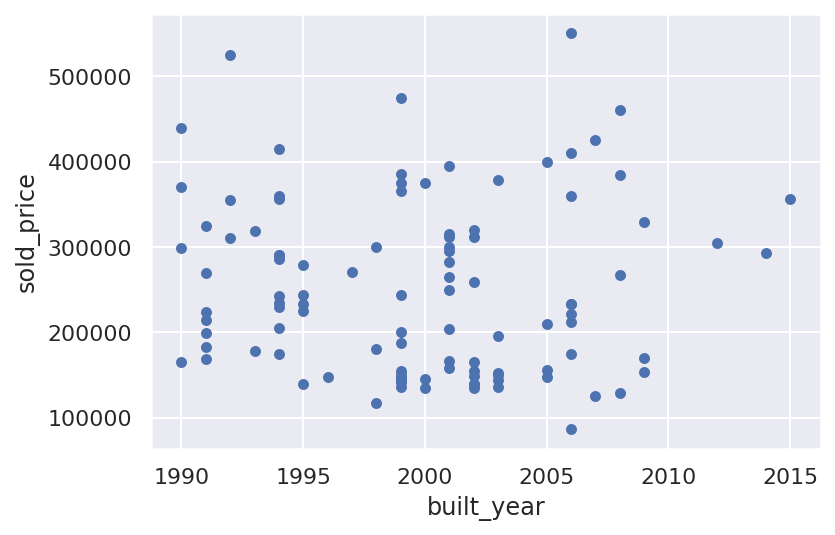

In [4]:
# it is easy to plot directly from pandas dataframes 
# (although we will learn more sophisticated plotting later in the course)

df.plot.scatter('built_year', 'sold_price')

In [43]:
df.bed_room_count.value_counts()

3    37
4    37
5    17
2    12
6     2
1     1
Name: bed_room_count, dtype: int64

In [42]:
# can extract lots of information from the dataframe
df.groupby('bed_room_count').sold_price.max()

bed_room_count
1    165400
2    167000
3    385000
4    525000
5    475000
6    550000
Name: sold_price, dtype: int64